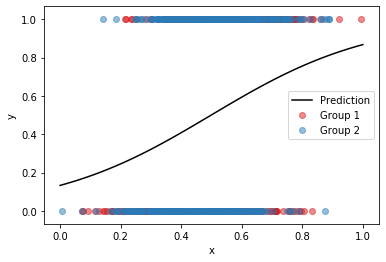

In [1]:
import os
import warnings
import tikzplotlib
import numpy as np
warnings.filterwarnings("ignore", category=RuntimeWarning) 
warnings.simplefilter('ignore', category=FutureWarning)
from input_parameters import input_parameters
from model import model

np.random.seed(0)
results_folder = 'results/feature_with_retraining/'

if not os.path.exists(results_folder):
    os.makedirs(results_folder)
input_parameters = input_parameters(feedback_loop_type = 'Feature', retraining = True, results_folder = results_folder)

Model = model(input_parameters)
t=0
g1x_0, g1y_0, g2x_0, g2y_0, px_0, py_0 = Model.plot_ML_model(t)

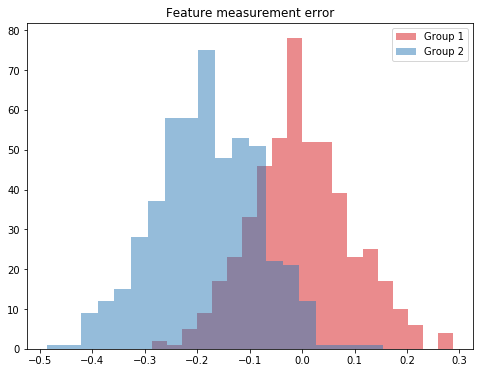

In [2]:
error0_vector0, error1_vector0 = Model.population.plot_hist_feature_error(t)

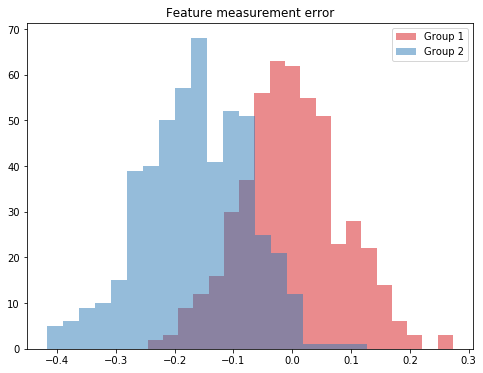

In [3]:
n_t = 2000 
t = t+n_t
Model.run(T=n_t)
error0_vector1, error1_vector1 = Model.population.plot_hist_feature_error(t)

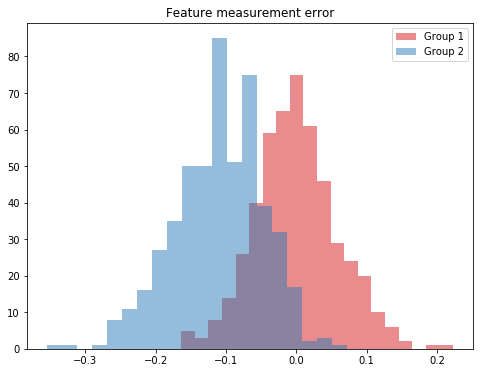

In [4]:
n_t = 8000 
t = t+n_t
Model.run(T=n_t)
error0_vector2, error1_vector2 = Model.population.plot_hist_feature_error(t)

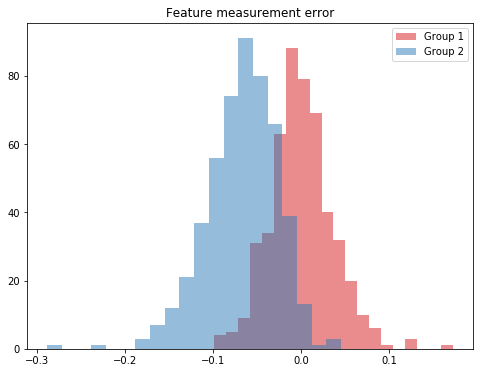

In [5]:
n_t = 10000 
t = t+n_t
Model.run(T=n_t)
error0_vector3, error1_vector3 = Model.population.plot_hist_feature_error(t)

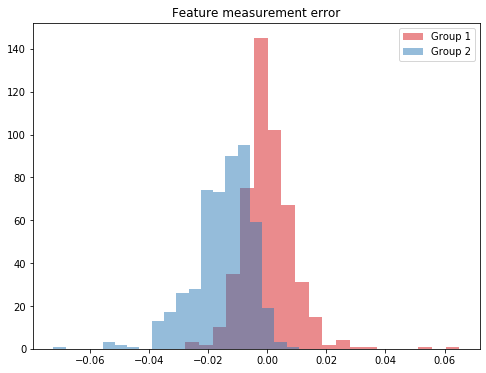

In [6]:
n_t = 30000 
t = t+n_t
Model.run(T=n_t)
error0_vector4, error1_vector4 = Model.population.plot_hist_feature_error(t)

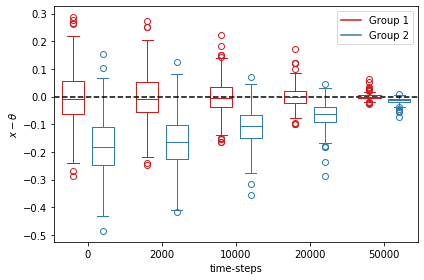

In [7]:
import matplotlib.pyplot as plt
import numpy as np


data_0 = [error0_vector0, error0_vector1, error0_vector2, error0_vector3, error0_vector4]
data_1 = [error1_vector0, error1_vector1, error1_vector2, error1_vector3, error1_vector4]

ticks = ['0', '2000', '10000', '20000', '50000']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

plt.figure()

flierprops = dict(markeredgecolor='#D7191C')

bpl = plt.boxplot(data_0, positions=np.array(range(len(data_0)))*2.0-0.4, widths=0.6, flierprops=flierprops)
flierprops = dict(markeredgecolor='#2C7BB6')
bpr = plt.boxplot(data_1, positions=np.array(range(len(data_1)))*2.0+0.4, widths=0.6, flierprops=flierprops)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Group 1')
plt.plot([], c='#2C7BB6', label='Group 2')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.legend()

plt.xlabel('time-steps')
plt.ylabel(r'$x-\theta$')
plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.tight_layout()
tikzplotlib.save(results_folder+'thetas.tikz')

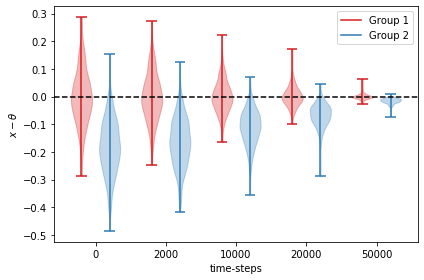

In [8]:
import matplotlib.pyplot as plt

data_0 = [error0_vector0, error0_vector1, error0_vector2, error0_vector3, error0_vector4]
data_1 = [error1_vector0, error1_vector1, error1_vector2, error1_vector3, error1_vector4]

ticks = ['0', '2000', '10000', '20000', '50000']

def set_box_color(bp, color):
    plt.setp(bp['bodies'], color=color)
    plt.setp(bp['cmaxes'], color=color)
    plt.setp(bp['cmins'], color=color)
    plt.setp(bp['cbars'], color=color)

plt.figure()

bpl = plt.violinplot(data_0, positions=np.array(range(len(data_0)))*2.0-0.4, widths=0.6)
bpr = plt.violinplot(data_1, positions=np.array(range(len(data_1)))*2.0+0.4, widths=0.6)
set_box_color(bpl, '#D7191C') # colors are from http://colorbrewer2.org/
set_box_color(bpr, '#2C7BB6')

# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='#D7191C', label='Group 1')
plt.plot([], c='#2C7BB6', label='Group 2')
plt.axhline(y = 0, color = 'black', linestyle = '--')
plt.legend()

plt.xticks(range(0, len(ticks) * 2, 2), ticks)
plt.xlabel('time-steps')
plt.ylabel(r'$x-\theta$')
plt.tight_layout()
tikzplotlib.save(results_folder+'thetas_violin.tikz')

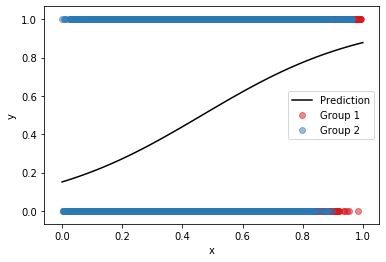

In [9]:
g1x_0, g1y_0, g2x_0, g2y_0, px_1, py_1 = Model.plot_ML_model(t)